# Simple Linear Regression

In [1]:
# Import all the packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [2]:
#Importing the dataset

df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Getting the insights from the dataset

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# The required dataset

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


In [5]:
# Checking for the presence of any NaN values in each columns

for col in cdf.columns:
    print('The no. of NaN values in the column {} is : {}'.format(col,cdf[col].isnull().sum()))

The no. of NaN values in the column ENGINESIZE is : 0
The no. of NaN values in the column CYLINDERS is : 0
The no. of NaN values in the column FUELCONSUMPTION_COMB is : 0
The no. of NaN values in the column CO2EMISSIONS is : 0


In [6]:
# The size of the cdf dataset

cdf.shape

(1067, 4)

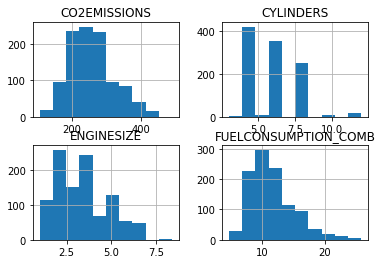

In [7]:
# Now we visualize each columns on a histogram

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

       Now we plot the scatter plot between every columns and the CO2EMISSIONS column

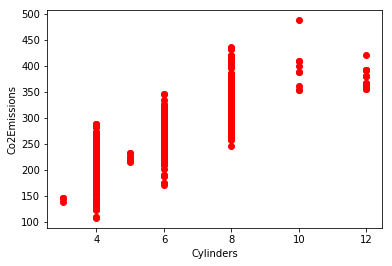

In [8]:
# Cylinders vs Co2Emissions

plt.scatter(cdf['CYLINDERS'],cdf['CO2EMISSIONS'],color='red')
plt.xlabel('Cylinders')
plt.ylabel('Co2Emissions')
plt.show()

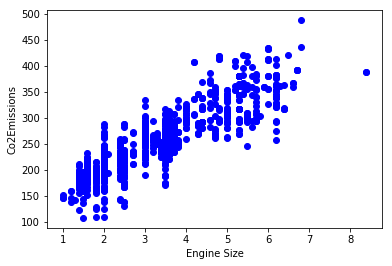

In [9]:
# EngineSize vs Co2Emissions

plt.scatter(cdf['ENGINESIZE'],cdf['CO2EMISSIONS'],color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Co2Emissions')
plt.show()

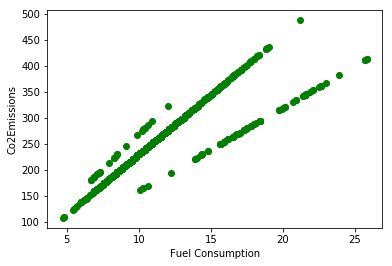

In [10]:
# FuelConsumption vs Co2Emissions

plt.scatter(cdf['FUELCONSUMPTION_COMB'],cdf['CO2EMISSIONS'],color='green')
plt.xlabel('Fuel Consumption')
plt.ylabel('Co2Emissions')
plt.show()

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [11]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<b>Train data distribution</b>

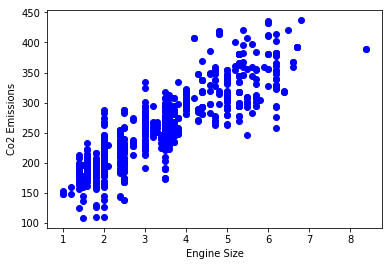

In [12]:
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

<b>Model Data </b>

In [13]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x,train_y)

print(' Regression Coefficient: {} \n\n Regression Intercept: {}'.format(regr.coef_,regr.intercept_))

 Regression Coefficient: [[38.84867121]] 

 Regression Intercept: [126.30495257]


<b> Plotting the Regression Line </b>


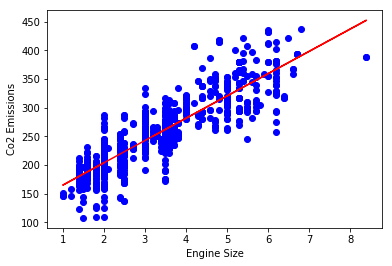

In [14]:
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],color = 'blue')
plt.plot(train_x,regr.intercept_[0]+(regr.coef_[0][0]*train_x),'-r')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

<b> Model Evaluation </b>

In [15]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

# Mean Absolute Error
mae = np.mean(np.absolute(test_y_hat - test_y))

# Mean Square Error
mse = np.mean((test_y_hat - test_y) ** 2)

# R2 value
r2 = r2_score(test_y_hat,test_y)

print(' Mean Absolute Error : {} \n\n Mean Square Error : {} \n\n R2 value : {}'.format(mae,mse,r2))

 Mean Absolute Error : 23.67036528204709 

 Mean Square Error : 913.654999457706 

 R2 value : 0.7085811046128474




# Multiple Linear Regression

### Reading the data in

In [16]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [17]:
# Retrieving the required data

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


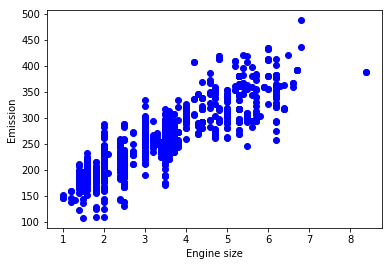

In [18]:
# Plotting emission values wrt to Engine size

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [19]:
# Creating train and test datasets

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [20]:
# Applying Multiple Linear Regression on the data

from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print('Intercept: ' , regr.intercept_)

Coefficients:  [[12.39086681  6.6191368   9.53929216]]
Intercept:  [66.6669086]


In [21]:
# Prediction

y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 576.56
Variance score: 0.86


### Well This time we got a better Variance Score efficieny

# Polynomial Regression

In [22]:
# We will be working on the same dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [23]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [24]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


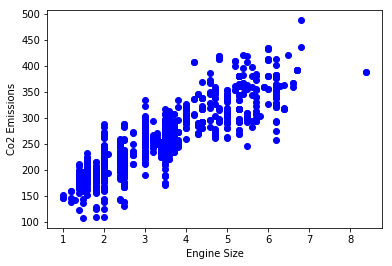

In [25]:
# we will visualize the scatter plot of ENGINESIZE vs CO2EMISSIONS

plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

In [27]:
# We will try to define a Training set and a Testing set of the data given

msk = np.random.rand(len(df)) <0.8
train = cdf[msk]
test = cdf[~msk]


In [30]:
# Then we will apply Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)

clf = LinearRegression()
train_y = clf.fit(train_x_poly,train_y)

print('The coefficient is : {} \n The intercept is : {}'.format(clf.coef_,clf.intercept_))

The coefficient is : [[ 0.         32.39786344  3.39342348 -0.39727585]] 
 The intercept is : [126.7855883]


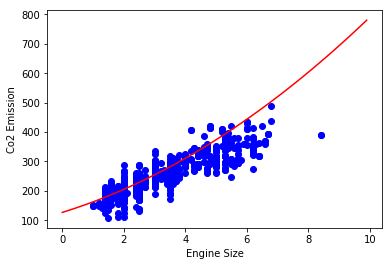

In [36]:
# Visualizing the data

plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],color='blue')

xx = np.arange(0.0,10.0,0.1)
yy = clf.intercept_[0]+clf.coef_[0][1]*xx+clf.coef_[0][2]*np.power(xx,2)

plt.plot(xx,yy,'-r')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emission')

plt.show()

In [37]:
# Accuracy

from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.12
Residual sum of squares (MSE): 931.48
R2-score: 0.69


# Non-Linear Regression

### Creating a random Dataset and plotting a degree=1 line to it

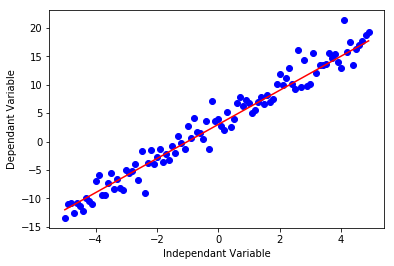

In [43]:
# Creating a random x axis values
x = np.arange(-5.0,5.0,0.1)

# Creating a random y axis values based on the equation y = 2x + 3
y = 3*x+3

y_noise = 2*np.random.normal(size=x.size)

# Total y data will be a combination of y values and noise 
y_data = y+y_noise

# Plot a scatter graph for x vs y_data

plt.scatter(x,y_data,color = 'blue')

# Plot a linear line of x vs y

plt.plot(x,y,'-r')

plt.xlabel('Independant Variable')
plt.ylabel('Dependant Variable')

plt.show()

# You can change the intercept and slope of the line accordingly

### Cubic Representation

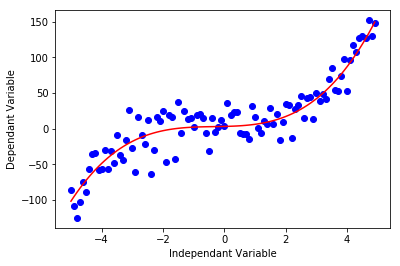

In [46]:
x = np.arange(-5.0,5.0,0.1)

y = 1*(x**3)+1*(x**2)+1*x+3

y_noise = 20*np.random.normal(size=x.size)

y_data = y+y_noise

plt.scatter(x,y_data,color='blue')
plt.plot(x,y,'-r')

plt.xlabel('Independant Variable')
plt.ylabel('Dependant Variable')

plt.show()

### Quadratic

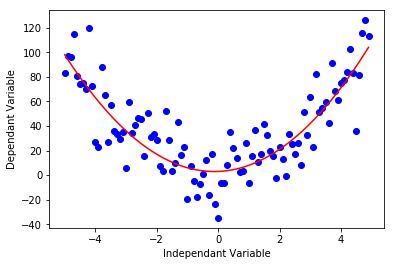

In [52]:
x = np.arange(-5.0,5.0,0.1)

y = 4*(x**2)+1*x+3

y_noise = 20*np.random.normal(size=x.size)

y_data = y+y_noise

plt.scatter(x,y_data,color='blue')
plt.plot(x,y,'-r')

plt.xlabel('Independant Variable')
plt.ylabel('Dependant Variable')

plt.show()

### Exponential

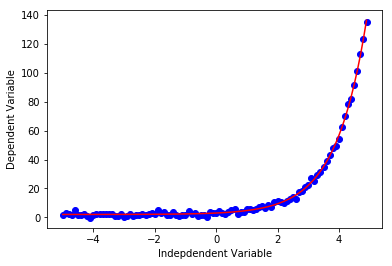

In [58]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= 2+np.exp(X)

Y_noise = np.random.normal(size = x.size)

Y_data = Y+Y_noise

plt.scatter(X,Y_data,color='blue')
plt.plot(X,Y,'-r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()